# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression Balanced Data Set</b></p>

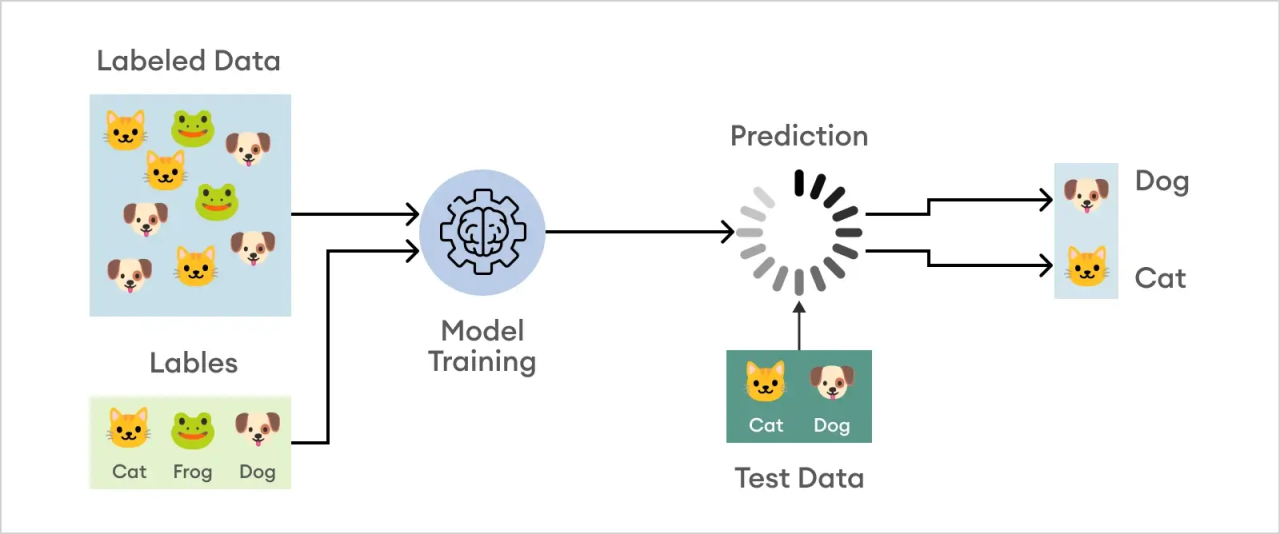

**Logistic Regression: An Overview**

- Despite its name containing the word "Regression", **Logistic Regression** is a classification method.

- It allows data to be separated according to specific classification criteria.

- It enables the separation of data into binary classes or multi-class categories.

- Therefore, it is categorized as a method that solves classification problems.

- The sigmoid function is a type of activation function that limits input values between 0 and 1.

- The threshold value is 0.5 by default but can be adjusted.

- When interpreting coefficients in logistic regression, we cannot interpret them directly as in linear regression; instead, we interpret them through odds ratios.

- Logistic regression transforms our classic linear regression equation (b2*X2 + b1*X1 + b0) into a probability.

**Key Concepts:**

Logistic regression is a statistical analysis method used to model the relationship between a dependent variable, typically associated with binary outcomes like yes/no, and one or more independent variables. It is used in scenarios such as determining whether a patient has a disease or predicting the probability of a student passing an exam.

**Important Points:**

- Logistic regression works with a categorical dependent variable, unlike linear regression which works with a continuous dependent variable.
- The model provides a probability-based approach and is particularly suitable for modeling binary outcomes.
- The assumptions and applicability of the model can vary depending on the data being analyzed and the research question.

# Exploratory Data Analysis

**Dataset Overview**

The dataset appears to be related to a hearing test and contains the following features:

1. **age**: This column represents the age of the individual taking the hearing test. This feature can be used to analyze the correlation between age and hearing ability.
2. **physical_score**: This column represents a score related to the physical condition of the individual. The exact nature of this score is not specified, but it likely quantifies some aspect of physical fitness or health.
3. **test_result**: This column indicates the result of the hearing test. The value **1** likely denotes a positive result (e.g., passed the test or has normal hearing), while **0** indicates a negative result (e.g., failed the test or has hearing issues). This is the target variable for classification problems.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("hearing_test.csv")
df.head(5)

age  physical_score  test_result
0 33.000          40.700            1
1 50.000          37.200            1
2 52.000          24.700            0
3 56.000          31.000            0
4 35.000          42.900            1

In [3]:
df.sample(10)

age  physical_score  test_result
4450 56.000          39.600            0
2754 45.000          39.800            1
2306 55.000          38.100            1
4025 45.000          39.300            1
1756 56.000          29.500            1
4867 47.000          38.900            1
979  60.000          32.500            1
918  76.000          21.000            0
2502 39.000          41.700            1
1275 48.000          33.100            0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe().T

count   mean    std    min    25%    50%    75%    max
age            5000.000 51.609 11.287 18.000 43.000 51.000 60.000 90.000
physical_score 5000.000 32.760  8.170 -0.000 26.700 35.300 38.900 50.000
test_result    5000.000  0.600  0.490  0.000  0.000  1.000  1.000  1.000

In [6]:
df["test_result"].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

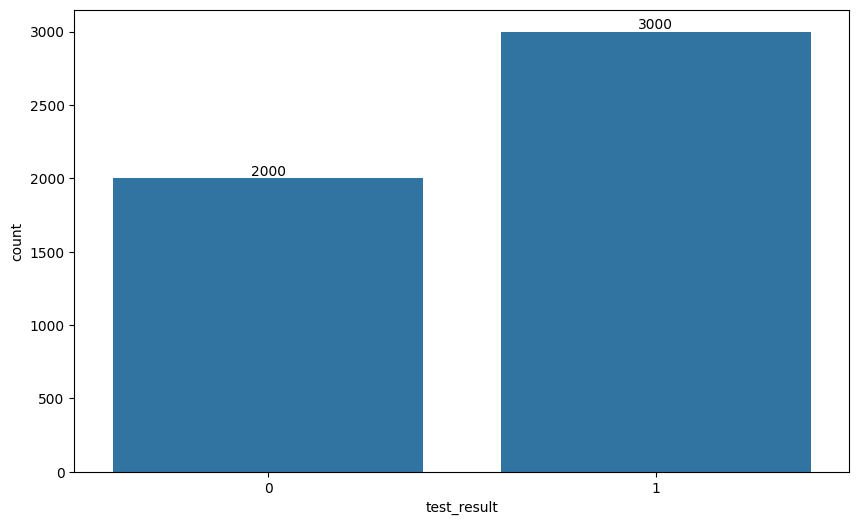

In [7]:
ax = sns.countplot(x = 'test_result', data = df)
ax.bar_label(ax.containers[0]);

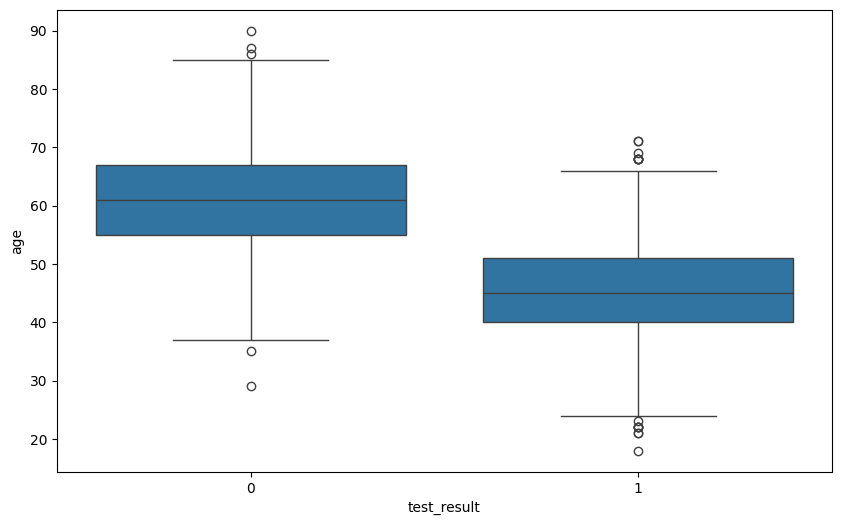

In [10]:
sns.boxplot(x = "test_result", y = "age", data=df);

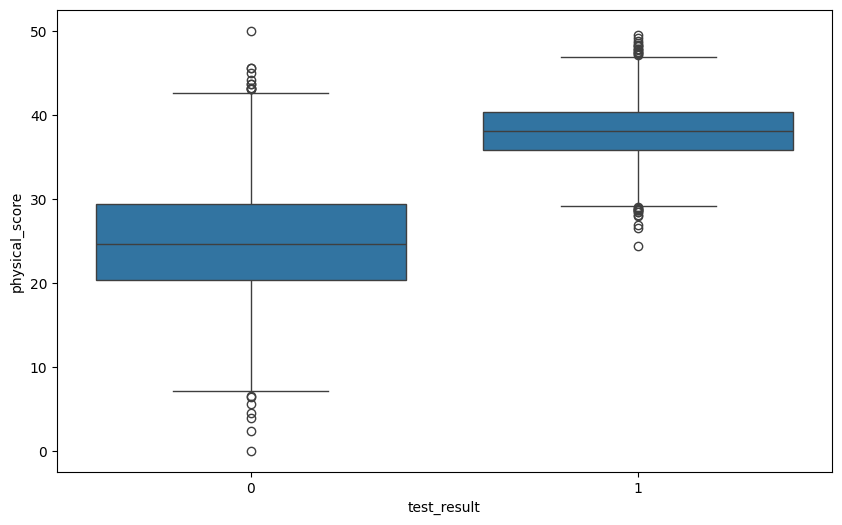

In [12]:
sns.boxplot(x = "test_result", y = "physical_score", data=df);

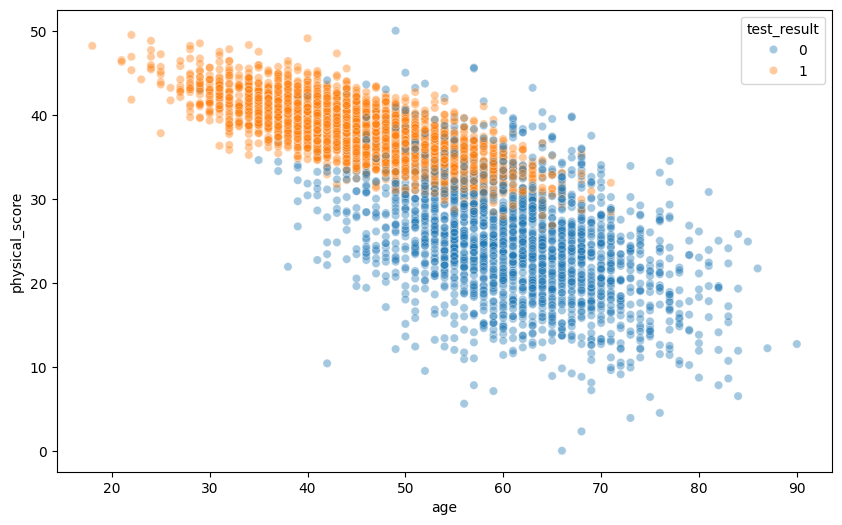

In [13]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.4)
plt.show()

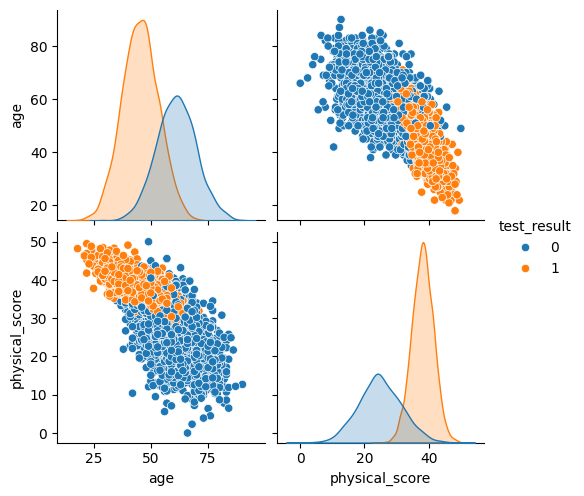

In [15]:
sns.pairplot(df, hue = "test_result");

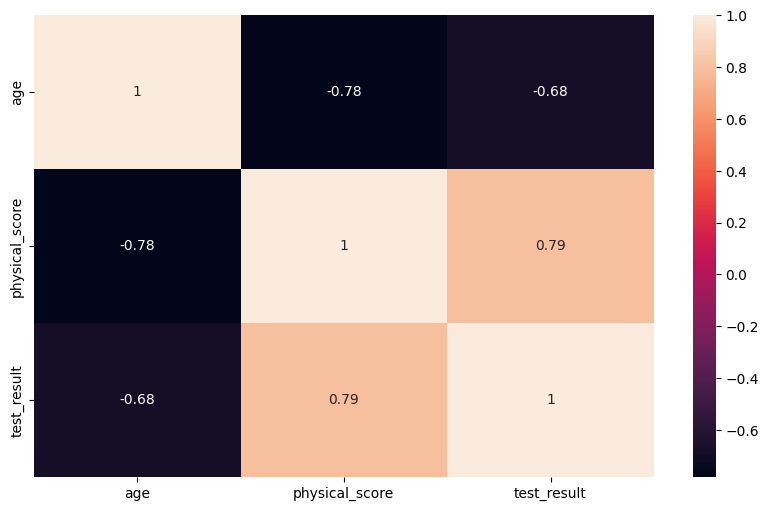

In [16]:
sns.heatmap(df.corr(), annot=True);

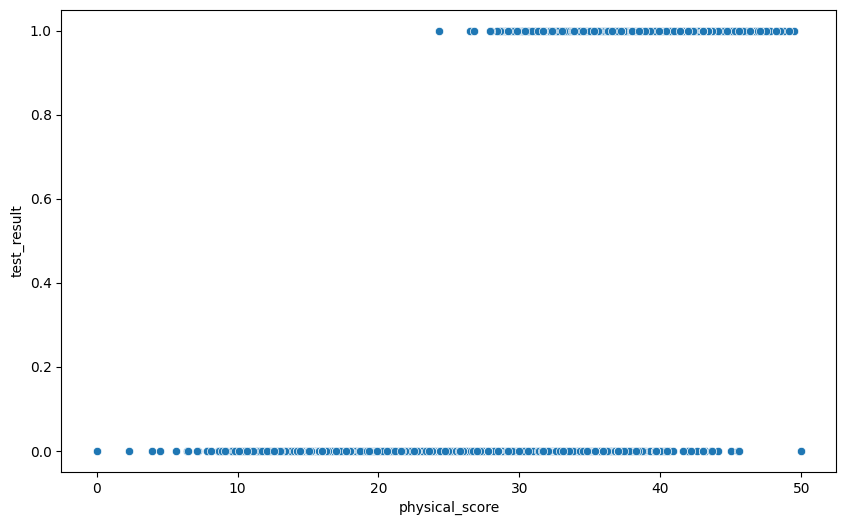

In [17]:
sns.scatterplot(x='physical_score', y='test_result', data=df)
plt.show()

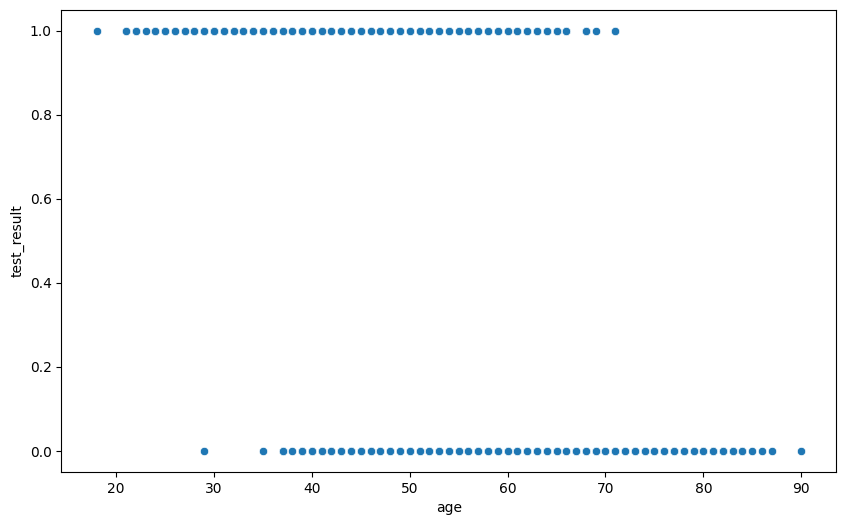

In [18]:
sns.scatterplot(x='age', y='test_result', data=df)
plt.show()

# Modelling for Logistic Regression

## Train | Test Split

In [19]:
X = df.drop("test_result", axis=1)
y = df["test_result"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Modeling without Scaling Data

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [25]:
log_model = LogisticRegression()


In [26]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [27]:
log_model.coef_

array([[-0.0790601 ,  0.43759344]])

In [28]:
b2, b1 = log_model.coef_[0]
print("b2 (age coef)       :", b2)
print("b1 (physical_score) :", b1)

b2 (age coef)       : -0.07906009922209005
b1 (physical_score) : 0.437593441036832


## Modeling with Scaling Data

**Pipeline** is a concept where steps in a data processing workflow are connected and executed sequentially.

A pipeline typically consists of several steps, where each step processes the output of the previous step and provides input for the next step.

In a pipeline, transformation algorithms that perform fit and transform operations are added first, followed by ML algorithms that perform fit and predict operations.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [42]:
operations= [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

In [43]:
pipe_model = Pipeline(steps=operations)

In [ ]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [45]:
pipe_model["logistic"].coef_

array([[-0.9039212 ,  3.48681952]])

In [ ]:
log_model.coef_

array([[-0.0790601 ,  0.43759344]])

In [46]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [ ]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba
# predict_proba shows the probability of each observation in the test data being assigned to a specific class.
# The first value represents the probability of belonging to class 0, while the second value represents the probability of belonging to class 1.
# The class with the higher value is the one to which the observation is assigned.

array([[0.02436668, 0.97563332],
       [0.02672574, 0.97327426],
       [0.9893468 , 0.0106532 ],
       ...,
       [0.02396838, 0.97603162],
       [0.94905149, 0.05094851],
       [0.22356825, 0.77643175]])

In [48]:
y_pred_proba_rounded = np.round(y_pred_proba, 2)
y_pred_proba_rounded

array([[0.02, 0.98],
       [0.03, 0.97],
       [0.99, 0.01],
       ...,
       [0.02, 0.98],
       [0.95, 0.05],
       [0.22, 0.78]])

In [50]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

age  physical_score  test_result
1718 39.000          37.800            1
2511 45.000          38.700            1
345  56.000          21.800            0
2521 40.000          44.000            1
54   64.000          25.400            0
...     ...             ...          ...
3900 71.000          23.300            0
3753 51.000          32.600            1
3582 42.000          38.400            1
2392 52.000          24.800            0
3343 54.000          34.900            1

[1000 rows x 3 columns]

In [ ]:

test_data["pred_proba"]= y_pred_proba_rounded[:, 1]
test_data
# Add a new column/feature named 'pred_proba' to the test_data DataFrame,which shows the probabilities of belonging to class 1.

age  physical_score  test_result  pred_proba
1718 39.000          37.800            1       0.980
2511 45.000          38.700            1       0.970
345  56.000          21.800            0       0.010
2521 40.000          44.000            1       1.000
54   64.000          25.400            0       0.030
...     ...             ...          ...         ...
3900 71.000          23.300            0       0.010
3753 51.000          32.600            1       0.620
3582 42.000          38.400            1       0.980
2392 52.000          24.800            0       0.050
3343 54.000          34.900            1       0.780

[1000 rows x 4 columns]

In [ ]:
test_data["pred"] = y_pred
test_data
# The target class is always set to 1.
# test_result aligns with pred_proba (predicted probability values) and pred values.
# While making predictions, the model assigns probabilities of 0.5 and greater to class 1, and probabilities less than 0.5 to class 0.
# We add the model's predictions as the 'pred' feature to the test_data DataFrame

age  physical_score  test_result  pred_proba  pred
1718 39.000          37.800            1       0.980     1
2511 45.000          38.700            1       0.970     1
345  56.000          21.800            0       0.010     0
2521 40.000          44.000            1       1.000     1
54   64.000          25.400            0       0.030     0
...     ...             ...          ...         ...   ...
3900 71.000          23.300            0       0.010     0
3753 51.000          32.600            1       0.620     1
3582 42.000          38.400            1       0.980     1
2392 52.000          24.800            0       0.050     0
3343 54.000          34.900            1       0.780     1

[1000 rows x 5 columns]

In [ ]:
test_data.sample(10)
# Samples from the test data are taken and checked for errors. 
# If errors exist, their causes are investigated.
# Errors may occur for values close to 0.5, for example, test_result is 0 but pred is 1.
# In models, high pred_proba values are desirable.

age  physical_score  test_result  pred_proba  pred
3098 46.000          37.900            1       0.960     1
1715 40.000          43.300            1       1.000     1
3377 30.000          43.600            1       1.000     1
2371 46.000          36.400            0       0.930     1
345  56.000          21.800            0       0.010     0
1429 47.000          34.500            1       0.840     1
105  55.000          34.500            1       0.730     1
2042 44.000          34.800            1       0.880     1
4489 50.000          37.000            1       0.920     1
490  42.000          37.500            1       0.970     1

In [ ]:
# Selecting the incorrect predictions
test_data[((test_data["test_result"]==1) & (test_data["pred"]==0)) | ((test_data["test_result"]==0) & (test_data["pred"]==1)) ]
# test_data[test_data.test_result != test_data.pred]

age  physical_score  test_result  pred_proba  pred
2371 46.000          36.400            0       0.930     1
618  63.000          33.400            1       0.470     0
2145 65.000          35.200            0       0.620     1
3200 60.000          32.900            1       0.480     0
1726 46.000          36.700            0       0.930     1
...     ...             ...          ...         ...   ...
2420 60.000          32.500            1       0.430     0
3917 48.000          33.400            0       0.750     1
2452 61.000          33.600            0       0.530     1
1845 50.000          31.900            0       0.570     1
4273 58.000          33.900            0       0.620     1

[83 rows x 5 columns]

In [63]:
df.loc[2371]

age              46.000
physical_score   36.400
test_result       0.000
Name: 2371, dtype: float64

# Model Performance on Classification Tasks

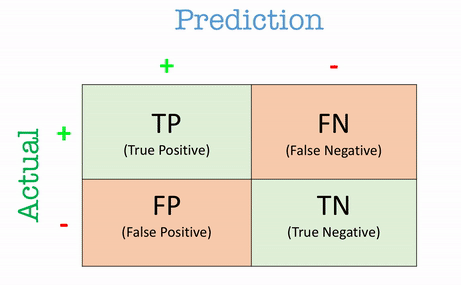

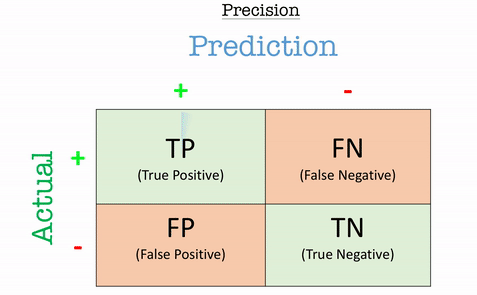

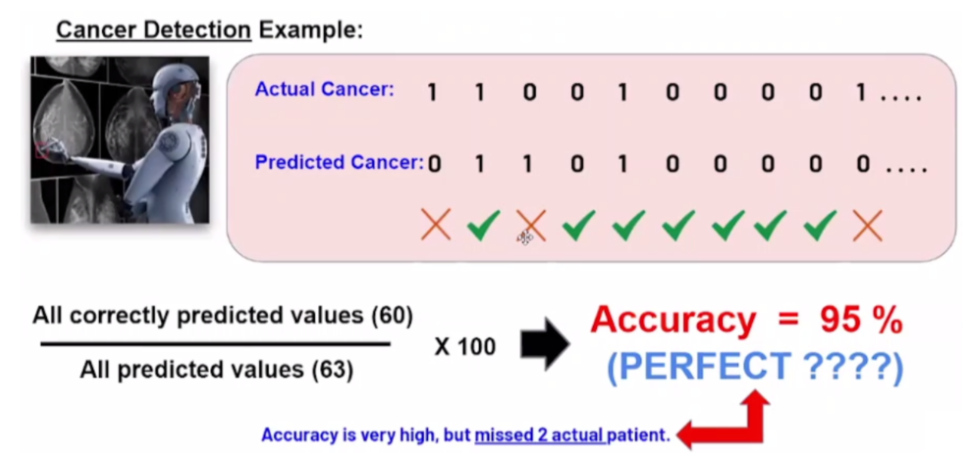

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
# Importing the necessary libraries to calculate performance metrics
# accuracy_score: Calculates the model's accuracy rate
# precision_score: Calculates the ratio of true positive predictions to total positive predictions
# recall_score: Calculates the ratio of true positive predictions to total actual positives
# f1_score: Calculates the harmonic mean of Precision and Recall
# log_loss: Calculates the model's loss based on the predicted probabilities


In [ ]:
accuracy_score(y_test, y_pred)
# Calculates the accuracy rate of the model. 
# Accuracy rate is the ratio of the model's correct predictions to all predictions.

# y_test: Actual class labels
# y_pred: Predicted class labels by the model

0.917

In [ ]:
pipe_model.score(X_test, y_test)
# When we pass X_test and y_test to the score function, it returns the accuracy score.
# The pipe_model takes X and y test data and provides the same values as accuracy_score.

0.917

In [ ]:
precision_score(y_test, y_pred, pos_label=1) # default = pos_label=1
# pos_label=1: Label of the positive class
# By default, it returns the precision score for class 1.
# It shows how many of the predictions for class 1 are correct.
# A precision of 0.1 means the model correctly predicted 10% of its predictions.
# For the score of class 0, pos_label=0 should be set.

np.float64(0.9126365054602185)

In [70]:
precision_score(y_test, y_pred, pos_label=0)

np.float64(0.924791086350975)

In [ ]:
recall_score(y_test, y_pred, pos_label=1)
# pos_label=1: Label of the positive class
# By default, it returns the recall_score for class 1.
# It shows how many of the actual positives for class 1 the model correctly predicted.
# A recall of 0.1 means the model correctly predicted 10% of the true positives in the positive class.
# For the score of the negative class, pos_label=0 should be set.

np.float64(0.9558823529411765)

In [72]:
recall_score(y_test, y_pred, pos_label=0)

np.float64(0.8556701030927835)

In [73]:
f1_score(y_test, y_pred, pos_label=1)

np.float64(0.9337589784517158)

In [74]:
f1_score(y_test, y_pred, pos_label=0)

np.float64(0.8888888888888888)

In [75]:
accuracy_score(y_test, y_pred)

0.917

In [76]:
log_loss(y_test, y_pred)
# log_loss measures how much the predicted probabilities deviate from the actual classes.
# The lower the log_loss value, the higher the accuracy of the model's predictions.
# A high log_loss value indicates that the model's predictions are far from the actual classes.

2.9916232312967237

In [ ]:
# Importing the necessary libraries for performance evaluation

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# confusion_matrix: Creates a confusion matrix to evaluate the performance of the model between actual and predicted classes
# classification_report: Produces a summary report of metrics like precision, recall, and f1-score
# ConfusionMatrixDisplay: Used to visualize the confusion matrix

In [ ]:
confusion_matrix(y_test, y_pred)

# The confusion matrix contains true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).
# Each cell of the matrix allows for a detailed analysis of the model's performance.

array([[332,  56],
       [ 27, 585]])

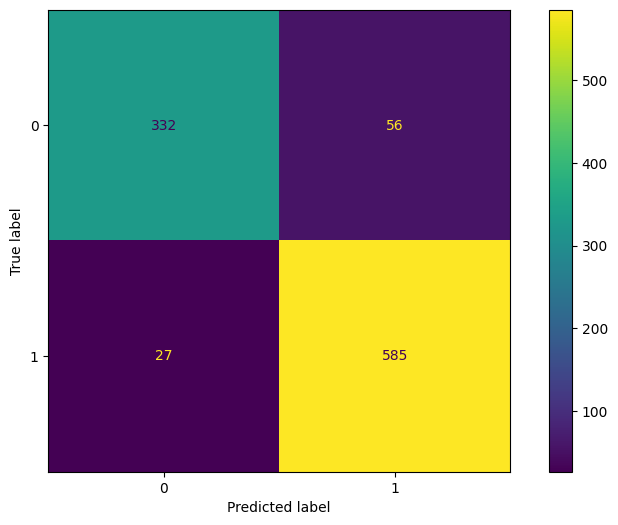

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

# ConfusionMatrixDisplay is used to visualize the confusion matrix.
# from_estimator: Creates and visualizes the confusion matrix based on the model's predictions.
# pipe_model: The model used for making predictions.

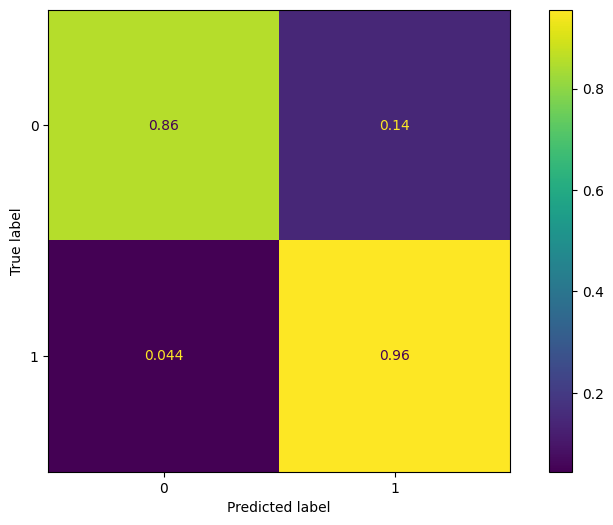

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, normalize='true')
plt.show()

# normalize='true': Normalizes the confusion matrix.
# Each cell value is shown as a proportion by dividing it by the total number of examples in the actual class.
# Each row is normalized by its own total.

In [ ]:
# We define our eval_metric function to observe both train and test set scores.
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# Speaking specifically for label '1':
# precision 0.91 means that 91% of my predictions are accurate.
# recall 0.96 means that I correctly identified 96% of the actual class '1' instances.
# f1 score represents the harmonic mean of precision and recall, and it should be interpreted based on the target metric (recall or precision).
# Interpreting it alone can lead to misinterpretations.
# Whether there is overfitting in the data is determined by comparing the test and train scores of the target class. 
# If the train set scores are significantly better than the test set scores, and if there is a large gap, it indicates overfitting.
# However, we don't decide on overfitting/underfitting by only looking at the train and test data scores.
# A definitive decision on overfitting/underfitting will be made after cross-validation.

Test_Set
[[332  56]
 [ 27 585]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       388
           1       0.91      0.96      0.93       612

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000


Train_Set
[[1401  211]
 [ 128 2260]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1612
           1       0.91      0.95      0.93      2388

    accuracy                           0.92      4000
   macro avg       0.92      0.91      0.91      4000
weighted avg       0.92      0.92      0.91      4000



## Cross Validation

In [87]:
from sklearn.model_selection import cross_validate

In [88]:
from sklearn.metrics import get_scorer_names
scorers_list = get_scorer_names()
print(scorers_list)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'r

In [ ]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores
# To make a definitive decision on overfitting/underfitting via cross-validation, 
# we set return_train_score=True to compare both train and validation set scores in each iteration.

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1      0.174       0.024          0.920           0.915           0.912   
2      0.011       0.019          0.930           0.914           0.907   
3      0.018       0.027          0.948           0.912           0.943   
4      0.017       0.016          0.938           0.913           0.946   
5      0.043       0.020          0.900           0.917           0.923   
6      0.032       0.014          0.905           0.916           0.914   
7      0.012       0.017          0.902           0.917           0.891   
8      0.015       0.018          0.900           0.917           0.903   
9      0.019       0.023          0.902           0.917           0.903   
10     0.016       0.015          0.907           0.917           0.901   

    train_precision  test_recall  train_recall  test_f1  train_f1  
1             0.914        0.958         0.946    0.934     0.930  
2             0.915        0.983         0.943    0.944     0.929  
3             0.911        0.971         0.944    0.957     0.927  
4             0.912        0.950         0.946    0.948     0.929  
5             0.917        0.908         0.947    0.916     0.932  
6             0.915        0.929         0.948    0.921     0.931  
7             0.918        0.954         0.946    0.921     0.932  
8             0.915        0.933         0.949    0.918     0.932  
9             0.916        0.937         0.947    0.920     0.931  
10            0.916        0.950         0.948    0.925     0.932

In [90]:
df_scores.mean()[2:]

test_accuracy     0.915
train_accuracy    0.916
test_precision    0.914
train_precision   0.915
test_recall       0.947
train_recall      0.947
test_f1           0.930
train_f1          0.930
dtype: float64

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

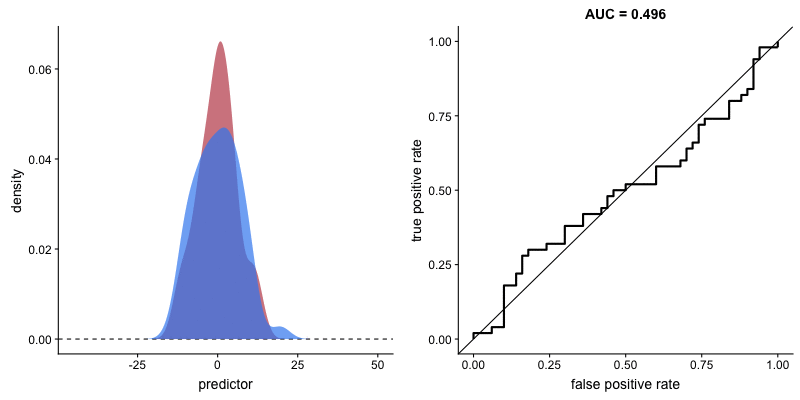

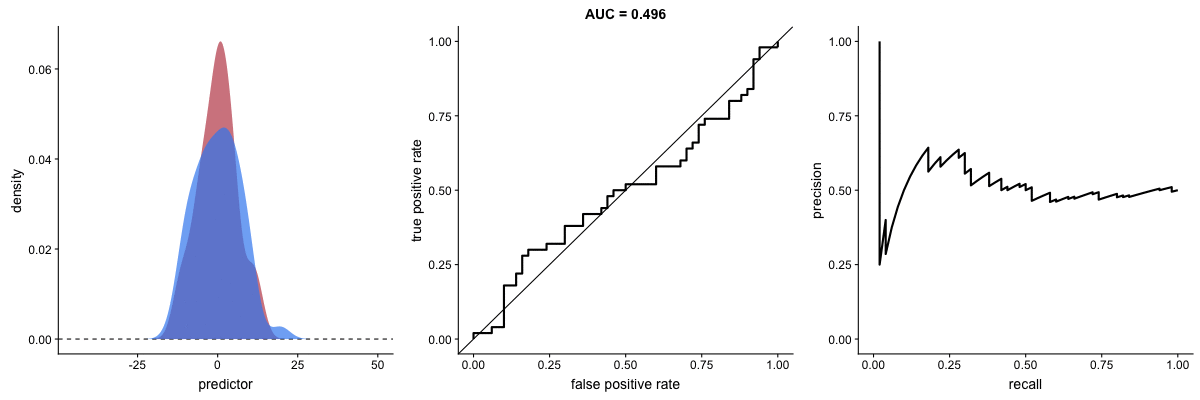

In [ ]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score
# Importing performance metrics and visualization tools.
# RocCurveDisplay: Used to visualize the ROC curve.
# PrecisionRecallDisplay: Used to visualize the Precision-Recall curve.
# roc_auc_score: Calculates the ROC AUC (Area Under Curve) score.
# auc: Calculates the overall area under the curve.
# roc_curve: Computes the values (FPR, TPR, and threshold values) needed for the ROC curve.
# average_precision_score: Calculates the average precision score.

# for old version ---- from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

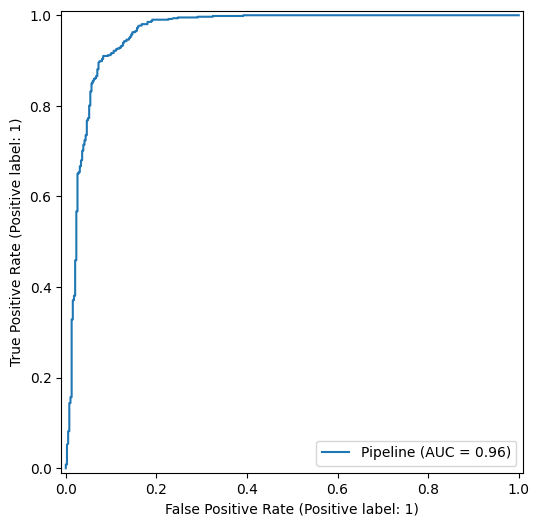

In [ ]:
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test)
plt.show()

# Model is 96% successful in distinguishing the positive (1) class from the negative (0) class.

In [94]:
roc_auc_score(y_test,y_pred_proba[:,1])

np.float64(0.9625151607034568)

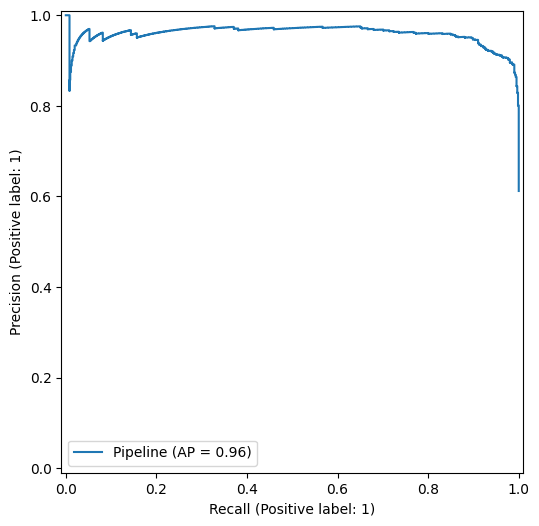

In [96]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test,y_test)
plt.show()

# While both AUC score and Average Precision score return similar values in balanced datasets,
# let's make it a habit to use AUC for balanced datasets and Average Precision scores for imbalanced datasets.
# We use them for imbalanced datasets.

In [97]:
average_precision_score(y_test,y_pred_proba[:,1])

np.float64(0.9595058133245105)

# Final Model and Model Deployment

## Without Pipeline

In [98]:
scaler = StandardScaler().fit(X)

In [99]:
import pickle

In [101]:
pickle.dump(scaler, open("scaler_hearing", "wb"))

In [103]:
X_scaled = scaler.transform(X)

In [104]:
final_model = LogisticRegression().fit(X_scaled, y)

In [110]:
pickle.dump(final_model, open("final_model_hearing", "wb"))

In [105]:
my_dict = {"age": [25, 35, 45, 55, 65],
           "physical_score": [45, 35, 25, 15, 5]}

In [106]:
sample = pd.DataFrame(my_dict)
sample

age  physical_score
0   25              45
1   35              35
2   45              25
3   55              15
4   65               5

In [107]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))

In [108]:
sample_scaled = scaler_hearing.transform(sample) # The DataFrame (sample) is given to the model (scaler_hearing)
sample_scaled


array([[-2.35772643,  1.49831839],
       [-1.47166291,  0.27417606],
       [-0.58559938, -0.94996628],
       [ 0.30046414, -2.17410862],
       [ 1.18652767, -3.39825096]])

In [111]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [112]:
predictions = final_model.predict(sample_scaled) # The scaled sample is provided to the final model for prediction.
predictions_proba = final_model.predict_proba(sample_scaled) # We obtain the probability values of the sample.


In [113]:
predictions

array([1, 1, 0, 0, 0])

In [114]:
pd.DataFrame(predictions_proba[:, 1])

0
0 1.000
1 0.941
2 0.088
3 0.001
4 0.000

## With Pipeline

In [125]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

In [126]:
final_model = Pipeline(steps=operations)

In [127]:
final_model.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [129]:
pickle.dump(final_model,open("final_pipe_model", "wb"))

In [ ]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [131]:
sample

age  physical_score
0   25              45
1   35              35
2   45              25
3   55              15
4   65               5

In [132]:
new_model.predict(sample)

array([1, 1, 0, 0, 0])

In [133]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

age  physical_score  pred  pred_proba
0   25              45     1       1.000
1   35              35     1       0.941
2   45              25     0       0.088
3   55              15     0       0.001
4   65               5     0       0.000